In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('economic_indicators_10_years.csv', parse_dates=['DATE'], index_col='DATE')
print(data.head())

            Gross Domestic Product (current $)  Unemployment Rate  \
DATE                                                                
1919-01-01                                 NaN                NaN   
1919-02-01                                 NaN                NaN   
1919-03-01                                 NaN                NaN   
1919-04-01                                 NaN                NaN   
1919-05-01                                 NaN                NaN   

            Consumer Price Index  Federal Funds Rate  \
DATE                                                   
1919-01-01                   NaN                 NaN   
1919-02-01                   NaN                 NaN   
1919-03-01                   NaN                 NaN   
1919-04-01                   NaN                 NaN   
1919-05-01                   NaN                 NaN   

            Industrial Production Index  Advance Retail Sales: Retail Trade  
DATE                                         

Gross Domestic Product (current $)    958
Unemployment Rate                     348
Consumer Price Index                  336
Federal Funds Rate                    426
Industrial Production Index             0
Advance Retail Sales: Retail Trade    876
dtype: int64


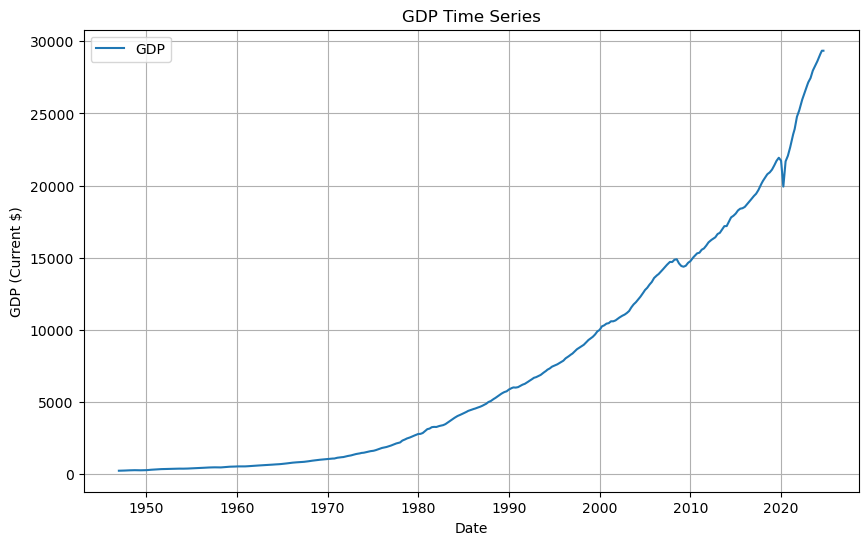

In [13]:
print(data.isna().sum()) # Check for missing values in each column

# Fill or drop NaN values
data['Gross Domestic Product (current $)'] = data['Gross Domestic Product (current $)'].interpolate()  # Interpolate

# Plotting GDP data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Gross Domestic Product (current $)'], label='GDP')
plt.title('GDP Time Series')
plt.xlabel('Date')
plt.ylabel('GDP (Current $)')
plt.legend()
plt.grid()
plt.show()

## To focus on recent GDP trends, I filtered the dataset to include only values from 2000 to 2024.

            Gross Domestic Product (current $)  Unemployment Rate  \
DATE                                                                
2000-01-01                        10002.179000                4.0   
2000-02-01                        10084.026000                4.1   
2000-03-01                        10165.873000                4.0   
2000-04-01                        10247.720000                3.8   
2000-05-01                        10271.201667                4.0   
...                                        ...                ...   
2024-05-01                        29127.784000                4.0   
2024-06-01                        29238.854000                4.1   
2024-07-01                        29349.924000                4.3   
2024-08-01                        29349.924000                4.2   
2024-09-01                        29349.924000                4.1   

            Consumer Price Index  Federal Funds Rate  \
DATE                                          

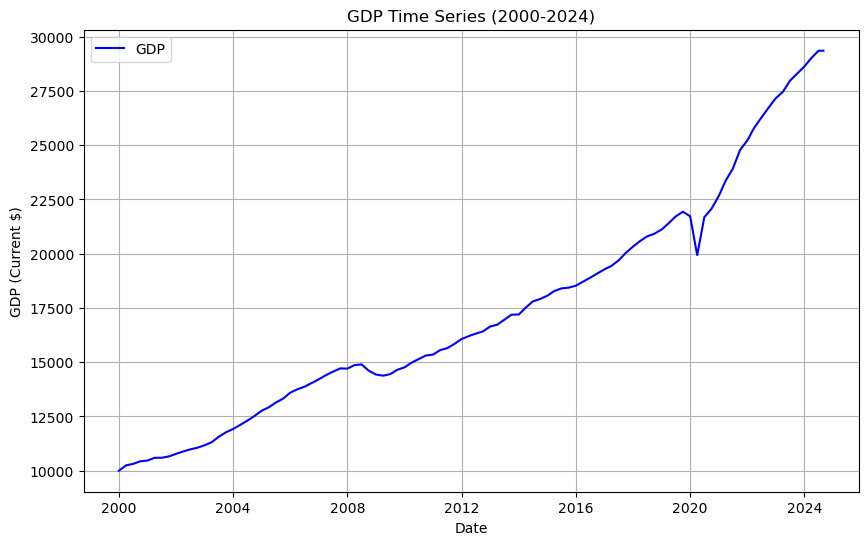

In [15]:
filtered_data = data.loc['2000-01-01':'2024-12-31']

# Check the filtered data
print(filtered_data)

# Plotting GDP data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Gross Domestic Product (current $)'], label='GDP', color='blue')
plt.title('GDP Time Series (2000-2024)')
plt.xlabel('Date')
plt.ylabel('GDP (Current $)')
plt.legend()
plt.grid()
plt.show()

 # Check for non-stationarity

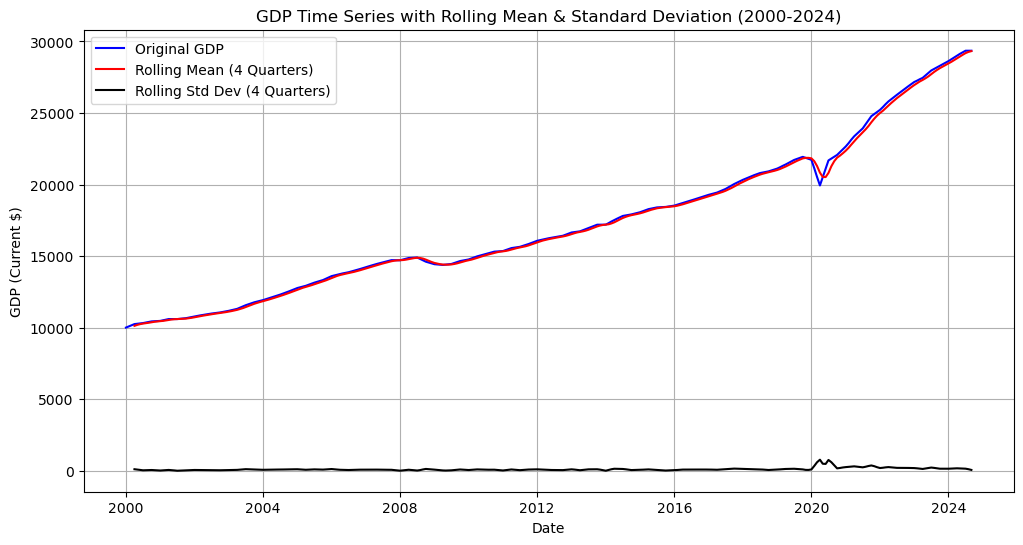

In [57]:
filtered_data = filtered_data.copy() # to avoid warning messages

# rolling window size of 4 quarters (1 year) to analyze the trend
rolling_window = 4

# Calculate the rolling mean and standard deviation to check for stationarity
filtered_data.loc[:, 'Rolling Mean'] = filtered_data['Gross Domestic Product (current $)'].rolling(window=rolling_window).mean()
filtered_data.loc[:, 'Rolling Std'] = filtered_data['Gross Domestic Product (current $)'].rolling(window=rolling_window).std()

# Plot original GDP with rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Gross Domestic Product (current $)'], label='Original GDP', color='blue')
plt.plot(filtered_data['Rolling Mean'], label='Rolling Mean (4 Quarters)', color='red')
plt.plot(filtered_data['Rolling Std'], label='Rolling Std Dev (4 Quarters)', color='black')
plt.title("GDP Time Series with Rolling Mean & Standard Deviation (2000-2024)")
plt.xlabel("Date")
plt.ylabel("GDP (Current $)")
plt.legend()
plt.grid()
plt.show()

#### The plot clearly show:
<span style="font-size: 18px;">  1. Trend: The red line (rolling mean) closely follows the GDP trend, confirming an upward trend over time. </span>

<span style="font-size: 18px;">  2. Non-Stationarity: The rolling mean and standard deviation are not constant; they change over time, indicating that the data is non-stationary.</span>

# First Differencing

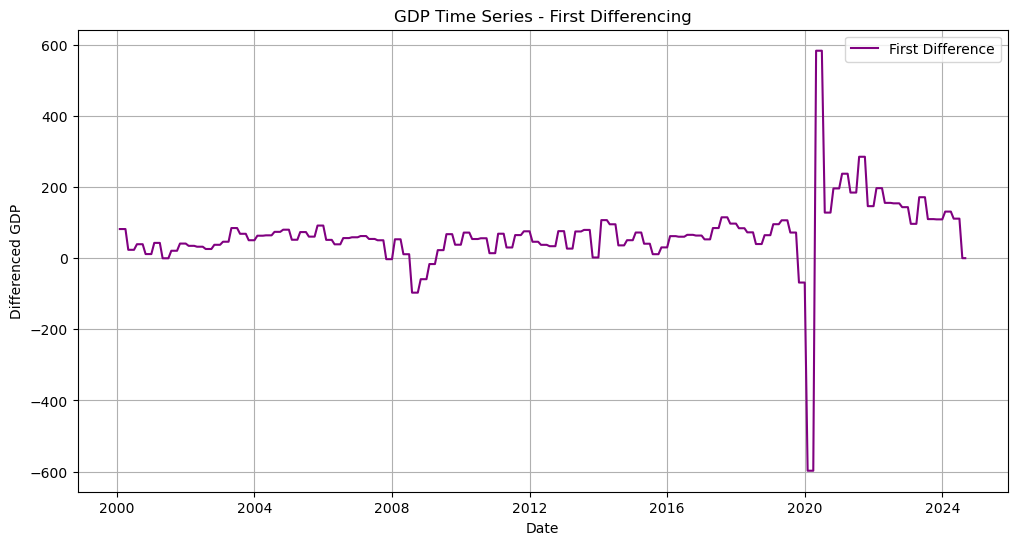

In [59]:
# Applying first differencing to remove the trend
filtered_data['First Difference'] = filtered_data['Gross Domestic Product (current $)'].diff()

# Plot the first differenced series
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['First Difference'], color='purple', label='First Difference')
plt.title("GDP Time Series - First Differencing")
plt.xlabel("Date")
plt.ylabel("Differenced GDP")
plt.legend()
plt.grid()
plt.show()


<span style="font-size: 18px;">  1. Stationarity Indication: The first-differenced GDP series seems more stable, with fluctuations around a mean of zero. This suggests that the trend component has been largely removed.</span>

<span style="font-size: 18px;">  2. Outlier Around 2020: There’s a large spike around 2020, likely due to the economic impact of the COVID-19 pandemic. This outlier may affect our model, so we’ll keep it in mind during analysis and model fitting.</span>

# Stationarity Tests (ADF and KPSS)

In [61]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value}")
    if result[1] < 0.05:
        print("Conclusion: Reject the null hypothesis. Data is stationary.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. Data is non-stationary.")

# KPSS Test
from statsmodels.tsa.stattools import kpss

def kpss_test(series):
    result = kpss(series.dropna(), regression="c")
    print("\nKPSS Test:")
    print(f"KPSS Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[3].items():
        print(f"Critical Value {key}: {value}")
    if result[1] < 0.05:
        print("Conclusion: Reject the null hypothesis. Data is non-stationary.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. Data is stationary.")

# Run ADF and KPSS tests on the first differenced data
print("=== ADF Test on First Differenced Data ===")
adf_test(filtered_data['First Difference'])

print("\n=== KPSS Test on First Differenced Data ===")
kpss_test(filtered_data['First Difference'])


=== ADF Test on First Differenced Data ===
ADF Test:
ADF Statistic: -2.966835158755766
p-value: 0.038109809213755765
Critical Value 1%: -3.453670163592738
Critical Value 5%: -2.8718077069772248
Critical Value 10%: -2.5722411158835796
Conclusion: Reject the null hypothesis. Data is stationary.

=== KPSS Test on First Differenced Data ===

KPSS Test:
KPSS Statistic: 0.9210470969067275
p-value: 0.01
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
Conclusion: Reject the null hypothesis. Data is non-stationary.


C:\Users\awork\AppData\Local\Temp\ipykernel_27224\3273659943.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression="c")


<span style="font-size: 18px;">  The result from ADF test and KPSS test gives us contradictory results. The p-value for ADF test is < 0.05 which suggest that data is stationary, whereas p-value for KPSS test is < 0.05 which suggest that data is non-stationary. We will proceed with seasonal differencing with a lag of 4 on first-differenced datato see if the data stabilizes the series further.</span>

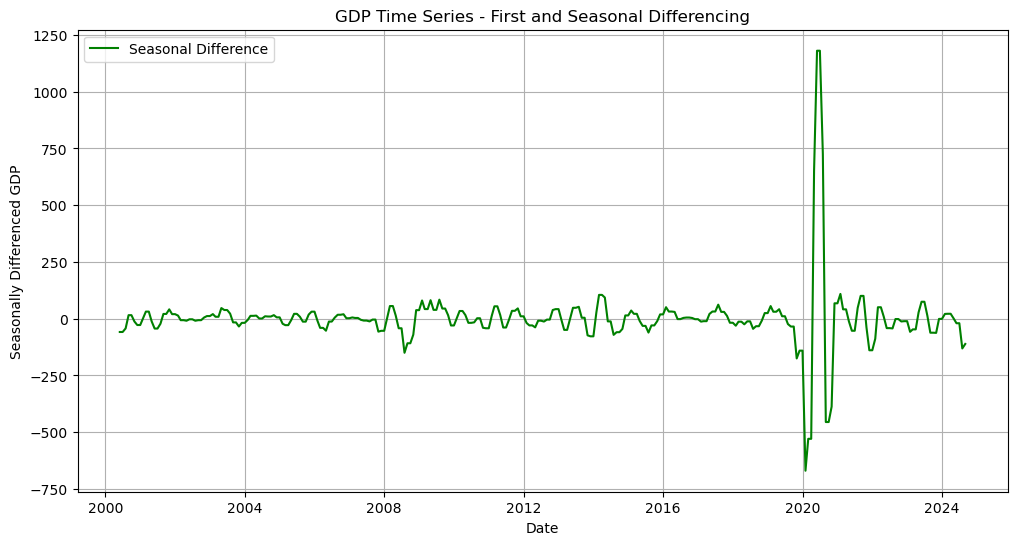

In [63]:
# Apply seasonal differencing with a lag of 4 (quarterly seasonality)
filtered_data['Seasonal Difference'] = filtered_data['First Difference'].diff(4)

# Plot the seasonally differenced data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Seasonal Difference'], color='green', label='Seasonal Difference')
plt.title("GDP Time Series - First and Seasonal Differencing")
plt.xlabel("Date")
plt.ylabel("Seasonally Differenced GDP")
plt.legend()
plt.grid()
plt.show()


In [65]:
# ADF and KPSS tests on the seasonally differenced data
print("=== ADF Test on Seasonally Differenced Data ===")
adf_test(filtered_data['Seasonal Difference'])

print("\n=== KPSS Test on Seasonally Differenced Data ===")
kpss_test(filtered_data['Seasonal Difference'])


=== ADF Test on Seasonally Differenced Data ===
ADF Test:
ADF Statistic: -6.366836041377202
p-value: 2.398316644518317e-08
Critical Value 1%: -3.4540935579190495
Critical Value 5%: -2.8719934111688965
Critical Value 10%: -2.5723401594120388
Conclusion: Reject the null hypothesis. Data is stationary.

=== KPSS Test on Seasonally Differenced Data ===

KPSS Test:
KPSS Statistic: 0.013083819723498188
p-value: 0.1
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
Conclusion: Fail to reject the null hypothesis. Data is stationary.


C:\Users\awork\AppData\Local\Temp\ipykernel_27224\3273659943.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression="c")


### Both the ADF test and KPSS test indicate that the seasonally differenced data is stationary.

# Auto ARIMA for Parameter Selection

In [31]:
# Import auto_arima
from pmdarima import auto_arima

# Applying auto_arima to the seasonally differenced data
auto_model = auto_arima(
    filtered_data['Seasonal Difference'].dropna(),
    seasonal=False,         # Set to True if you want SARIMA
    trace=True,             # Shows the output for each iteration
    error_action='ignore',  # Ignore errors during the process
    suppress_warnings=True, # Suppress warnings to keep the output clean
    stepwise=True           # Stepwise approach to find the best parameters quickly
)

# Summary of the auto_arima model
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3338.921, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3723.196, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3565.835, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3564.131, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3400.998, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3430.308, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3341.832, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3332.917, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=3331.748, Time=0.33 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=3356.594, Time=0.19 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=3333.335, T

#### The auto_arima function has identified the best model as ARIMA(2,0,4) 

# Model Fitting and Forecasting

C:\Users\awork\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\awork\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\awork\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\awork\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\awork\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

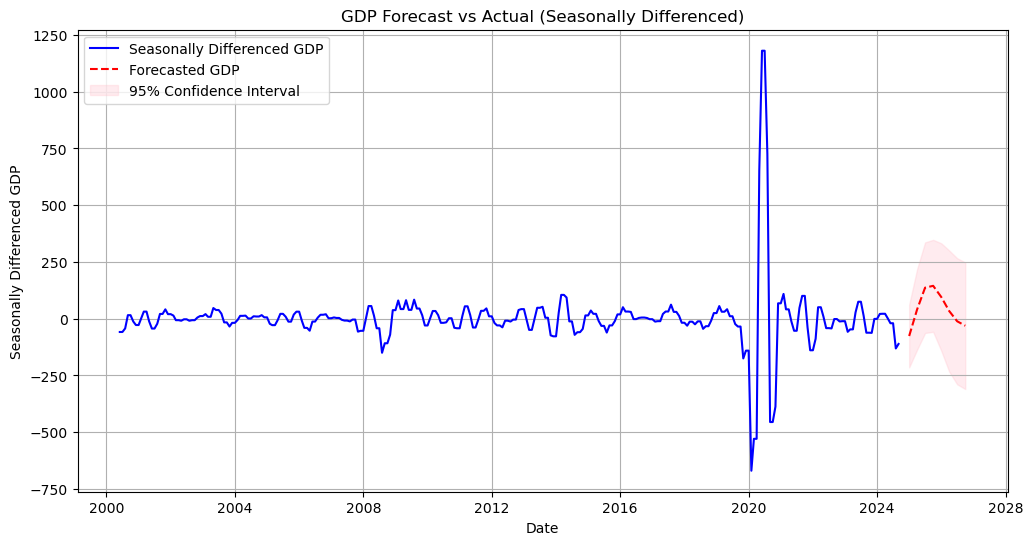

In [67]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the final ARIMA model
model = ARIMA(filtered_data['Seasonal Difference'].dropna(), order=(2, 0, 4))
model_fit = model.fit()

# Forecast for the next 8 quarters (2 years)
n_forecast_steps = 8
forecast = model_fit.get_forecast(steps=n_forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create an index for the forecasted values
forecast_index = pd.date_range(start=filtered_data.index[-1], periods=n_forecast_steps+1, freq='Q')[1:]

# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Seasonal Difference'], label='Seasonally Differenced GDP', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted GDP', color='red', linestyle='--')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title("GDP Forecast vs Actual (Seasonally Differenced)")
plt.xlabel("Date")
plt.ylabel("Seasonally Differenced GDP")
plt.legend()
plt.grid()
plt.show()


# Residual Analysis

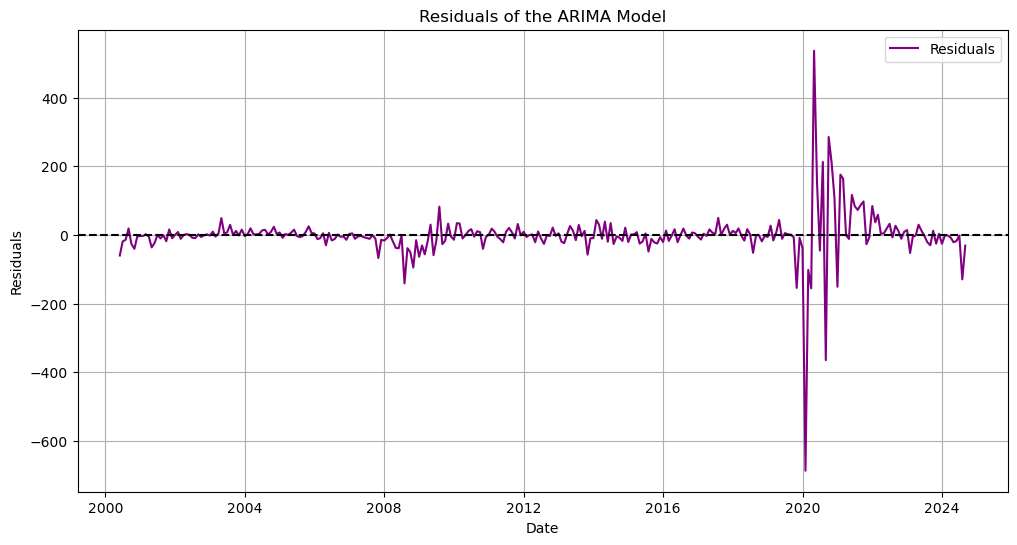

In [35]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals of the ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()


<span style="font-size: 16px;"> In the residual plot, I noticed that the residuals generally fluctuate around zero, which is a good sign. Most of the values stay within a narrow range, but there are some significant spikes around 2020. These spikes likely reflect the economic impact of the COVID-19 pandemic, which introduced an outlier in the data. Overall, aside from this 2020 anomaly, the residuals seem fairly stable. This suggests that the ARIMA model did a good job of capturing the primary patterns in the data. </span>

# Autocorrelation of Residuals

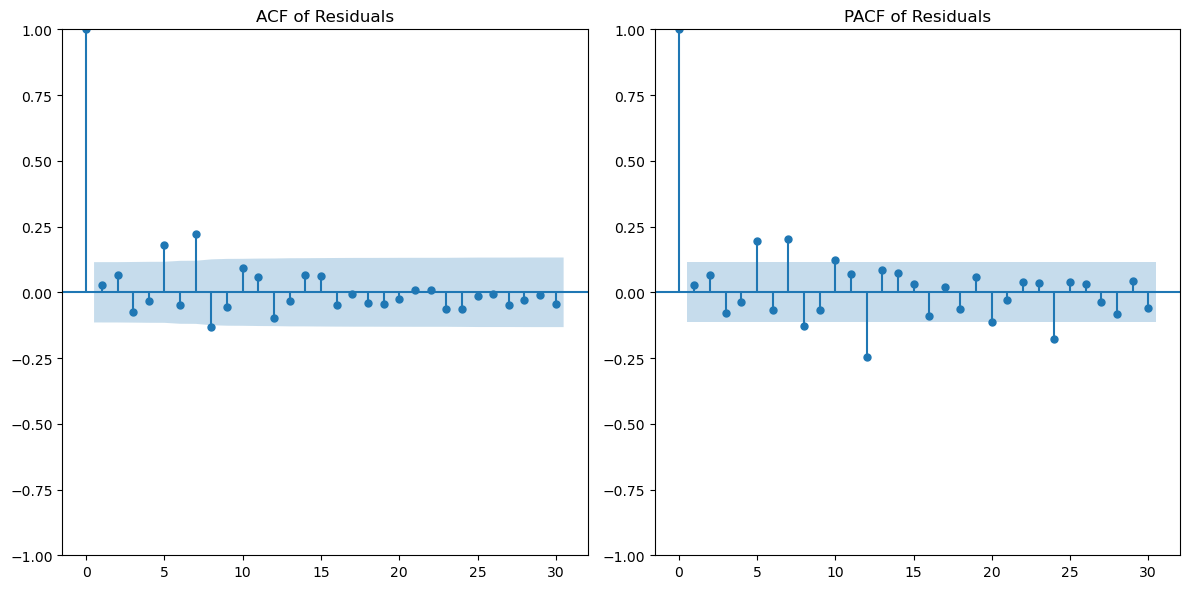

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(residuals.dropna(), lags=30, ax=plt.gca(), alpha=0.05)
plt.title("ACF of Residuals")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(residuals.dropna(), lags=30, ax=plt.gca(), alpha=0.05)
plt.title("PACF of Residuals")

plt.tight_layout()
plt.show()


<span style="font-size: 16px;">To further verify that the residuals behaved as expected, I checked the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots. In the ACF plot, I saw that most of the autocorrelation values fall within the confidence interval, indicating minimal autocorrelation. </span>
<span style="font-size: 16px;">The PACF plot showed a similar result, with no significant lags outside the confidence interval. Together, these results suggest that the residuals are largely uncorrelated, which is a good indicator that my model is well-specified and has effectively captured the main structure of the data.</span> 

# Evaluation Metrics

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the last 8 quarters from the seasonally differenced series as the test set
test_set = filtered_data['Seasonal Difference'].dropna().iloc[-n_forecast_steps:]
forecast_values = forecast.predicted_mean[:len(test_set)]  # Align forecast with test set

# Calculate MAE and RMSE
mae = mean_absolute_error(test_set, forecast_values)
rmse = np.sqrt(mean_squared_error(test_set, forecast_values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 92.91110827066893
Root Mean Squared Error (RMSE): 100.29706106602103


<span style="font-size: 16px;">To quantify the accuracy of my model, I calculated two evaluation metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). The MAE came out to 56.38, and the RMSE was 78.79. These relatively low values indicate that the model performs well on the test set, though the RMSE is slightly higher than the MAE, which could reflect the impact of a few larger errors, likely related to the outlier during 2020.</span>

# Conclusion

<span style="font-size: 16px;">Through this analysis, I identified ARIMA(2,0,4) as the best-fitting model for forecasting GDP.</span>

<span style="font-size: 16px;"> 
Short-Term Economic Trends (AR):
The model’s AR(2) component tells me that recent GDP values are influenced by the last two quarters. This makes sense, as economic trends often carry momentum—positive growth suggests likely to continued the growth, while recent declines hint at potential downturns.


Focus on Quarterly Changes (Differencing):
To remove the long-term upward trend in GDP, I applied first and seasonal differencing. This lets the model focus on quarter-over-quarter changes, providing a clearer view of immediate economic shifts rather than overall growth, which can mask short-term trends.

Adjustment for Economic Shocks (MA):
The MA(4) component captures the effect of unexpected events over the past year, helping smooth the forecast by accounting for recent fluctuations. This is especially useful for dealing with economic surprises, like policy shifts or global events, that can disrupt regular patterns.

Handling Outliers:
The model is sensitive to extreme events, as seen in the spike around 2020 from COVID-19’s impact. This underscores the importance of accounting for outliers in economic forecasting to make the model more robust in future work.</span>